In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import scipy as sp
from ipywidgets import interact

from epistasis.stats import pearson
from epistasis.models import (LinearEpistasisModel, 
     NonlinearEpistasisModel, 
     LinearEpistasisRegression)

In [9]:
def power_transform_fit(x, lmbda, A, B):
    gmean = sp.stats.mstats.gmean(x + A)
    if lmbda == 0:
        return gmean*np.log(x+A)
    else:
        first = (x+A)**lmbda
        out = (first - 1.0)/(lmbda * gmean**(lmbda-1)) + B
        return out

In [24]:
dataset = "hall_diploid_growth"
path_data = "../../datasets/" + dataset + ".json"

In [31]:
model = NonlinearEpistasisModel.from_json(
    path_data,
    order=1,
    function = power_transform_fit,
    log_transform=False,
    fix_linear=True,
    model_type="global"                   
)
model.fit(A=3,B=2,lmbda=1)
print(model.statistics.score)
print(model.parameters.A, model.parameters.B, model.parameters.lmbda)

0.801376895261
-0.730272777974 1.53078037249 0.793318062983


/Users/Zsailer/.virtualenvs/py3/lib/python3.5/site-packages/scipy/stats/stats.py:314: RuntimeWarning: invalid value encountered in log
  log_a = np.log(a)
/Users/Zsailer/.virtualenvs/py3/lib/python3.5/site-packages/ipykernel/__main__.py:7: RuntimeWarning: invalid value encountered in power


In [26]:
GMEAN = sp.stats.mstats.gmean(model.statistics.linear() + A)

def power_transform(lmbda, A, B):
    """"""
    if lmbda == 0:
        return GMEAN*np.log(x+A)
    else:
        first = (x+A)**lmbda
        out = (first - 1.0)/(lmbda * GMEAN**(lmbda-1)) + B
        return out
    
def reverse_function(y, lmbda, A, B):
    """"""
    return (GMEAN**(lmbda-1)*lmbda*(y - B) + 1)**(1/lmbda) - A


In [26]:
phenotypes_ = reverse_function(model.phenotypes, *model.parameters.get_params())

# Fit with high-order epistasis model
linear = LinearEpistasisModel.from_gpm(model, model_type="global")
linear.phenotypes = phenotypes_
linear.fit()

NameError: name 'A' is not defined

In [26]:
GMEAN = sp.stats.mstats.gmean(model.statistics.linear() + A)

def power_transform(lmbda, A, B):
    """"""
    if lmbda == 0:
        return GMEAN*np.log(x+A)
    else:
        first = (x+A)**lmbda
        out = (first - 1.0)/(lmbda * GMEAN**(lmbda-1)) + B
        return out
    
def reverse_function(y, lmbda, A, B):
    """"""
    return (GMEAN**(lmbda-1)*lmbda*(y - B) + 1)**(1/lmbda) - A

phenotypes_ = reverse_function(model.phenotypes, *model.parameters.get_params())

# Fit with high-order epistasis model
linear = LinearEpistasisModel.from_gpm(model, model_type="global")
linear.phenotypes = phenotypes_
linear.fit()

NameError: name 'A' is not defined

[]

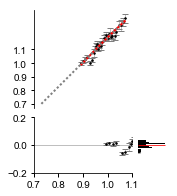

In [11]:
# Input
xdata = model.statistics.linear()
ydata = model.phenotypes
yerr =  model.std.upper
fdata = model.statistics.predict()

# dimensions

# khan
#datays = [.6,1.0]
#residualys = [-.2,.2]
#yticks = np.linspace(datays[0], datays[1],5)
#xticks = yticks

# krug
#datays = [.6,1.0]
#residualys = [-.2,.2]
#yticks = np.linspace(datays[0], datays[1],5)
#xticks = yticks

# weinreich
#datays = [.9,1.4]
#residualys = [-.1,.1]
#yticks = np.linspace(datays[0], datays[1],6)
#xticks = yticks

#anderson
#datays = [4,10]
#residualys = [-2,2]
#yticks = np.linspace(datays[0], datays[1],7)
#xticks = yticks

# hall haploid
datays = [.7,1.1]
residualys = [-.2,.2]
yticks = np.linspace(datays[0], datays[1],5)
xticks = yticks

import matplotlib.gridspec as gridspec

# Set up grid for plot
f = plt.figure(figsize=(3,3))
gs = gridspec.GridSpec(8,5)
gs.update(hspace=0.7)
corr = plt.subplot(gs[:5,:3])
resid = plt.subplot(gs[5:,:3])
hist = plt.subplot(gs[5:,3:4])

###################### Draw the correlation plots ##########################
errors = [model.std.lower, model.std.upper]
corr.errorbar(model.statistics.linear(), model.phenotypes, 
    yerr=errors,
    color='k', 
    fmt=".",
    ecolor="gray",
    elinewidth=.5,
    zorder=0,
    markersize=3
)
x = np.linspace(min(model.statistics.linear()), max(model.statistics.linear()))
y = model.function(x, *model.parameters.get_params())
corr.plot(x, y, color='r')
corr.plot(x, x, ":", color="gray")

# styling of the axis
corr.spines["right"].set_visible(False)
corr.spines["top"].set_visible(False)
corr.spines["bottom"].set_visible(False)
corr.set_xticks([])
corr.set_yticks(yticks)
corr.set_xlim(*datays)
corr.set_ylim(*datays)
#corr.set_xlim(*datays)
x2 = np.linspace(*datays, 10)
corr.plot(x2, x2, ":", color="gray")

corr.axis('equal')

#xticks = corr.get_yticks()
#print(xticks)
#print(corr.axis())

#print(corr.axis([datays[0],datays[1],datays[0],datays[1]]))

###################### Draw the residual plots ##########################
residuals = ydata - fdata
resid.errorbar(xdata, residuals, 
    color='k', 
    yerr=errors, 
    fmt=".", 
    ecolor="gray",
    elinewidth=.5,
    markersize=3,
)
#resid.set_yticks([-ys,ys])
resid.set_xlim(*datays)
resid.set_ylim(*residualys)
resid.set_xticks(yticks)

#resid.set_xticks(xticks)
#resid.set_xbound(xticks[0], xticks[-1])
residax = resid.axis()
resid.hlines(0, residax[0], residax[1], linestyle="-", color="gray", linewidth=.5)
#resid.spines["bottom"].set_bounds(xticks[0], xticks[-1])


###################### Draw the histogram plots ##########################
counts, bins, patch  = hist.hist(residuals, 
    bins=10,
    orientation="horizontal", 
    color="black"
)

hist.set_yticks((residax[0], residax[1]))
val = np.mean(residuals)
hist.hlines(val, 0, max(counts), linestyle="-", color="r", linewidth=.8)
hist.spines["right"].set_visible(False)
hist.spines["top"].set_visible(False)
hist.spines["bottom"].set_visible(False)
hist.spines["left"].set_visible(False)
hist.set_ylim(*residualys)
hist.set_yticks([])
hist.set_xticks([])


In [250]:
f.savefig("/Users/Zsailer/Dropbox/epistasis-paper/supplement/s-02/" + dataset + "-corr.svg", format="svg", bbox_height="tight")

In [220]:
f.savefig("/Users/Zsailer/Dropbox/epistasis-paper/figures/fig-5/" + dataset + "-corr.svg", format="svg", bbox_height="tight")

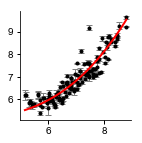

In [48]:
fig, ax = plt.subplots(figsize=(2,2.01))

# Draw errorbars first
errors = [model.std.lower, model.std.upper]
ax.errorbar(model.statistics.linear(), model.phenotypes, 
    yerr=errors,
    color='k', 
    fmt=".",
    ecolor="gray",
    elinewidth=1,
    zorder=0
)

x = np.linspace(min(model.statistics.linear()), max(model.statistics.linear()))
y = model.function(x, *model.parameters.get_params())
ax.plot(x, y, color='r')#, zorder=)

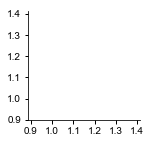

In [53]:
#weinreich
ax.axis("equal")
ax.axis([.9, 1.4, .9,1.415])
ax.set_xticks(np.linspace(.9,1.4,6))
ax.set_yticks(np.linspace(.9,1.4,6))
fig

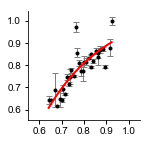

In [281]:
#krug2
ax.axis("equal")
ax.axis([.55, 1.05, .55,1.05])
ax.set_xticks(np.linspace(.6,1,5))
ax.set_yticks(np.linspace(.6,1,5))
fig

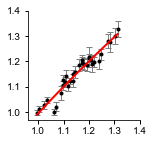

In [124]:
#khan
ax.axis("equal")
ax.axis([.96, 1.4, .96,1.41])
ax.set_xticks(np.linspace(1,1.4,5))
ax.set_yticks(np.linspace(1,1.4,5))
fig

In [ ]:
#anderson
ax.axis("equal")
ax.axis([4.5,10.1,4.5,10.1])
ax.set_xticks(np.linspace(5,10,6))
ax.set_yticks(np.linspace(5,10,6))

In [282]:
fig.savefig("/Users/Zsailer/Dropbox/epistasis-paper/figures/fig-5/"+dataset+"-curve.svg", format="svg", bbox_height="tight")

(<matplotlib.figure.Figure at 0x10c784f98>,
  <matplotlib.axes._subplots.AxesSubplot at 0x10c8164e0>])

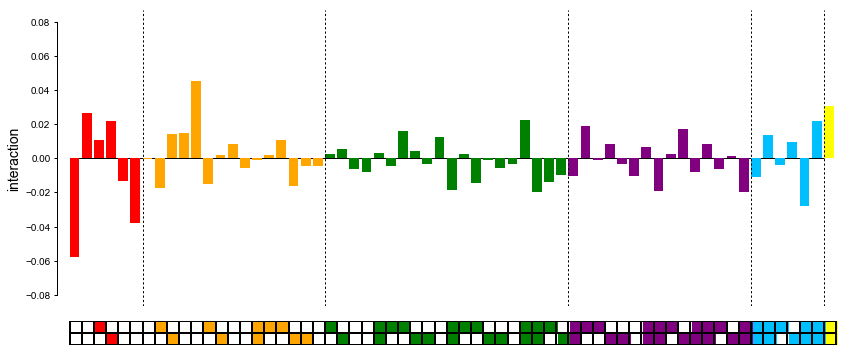

In [46]:
linear.plot.epistasis(figsize=(12,5))

khan 0.94 0.98 0.94 0.98
krug1 0.68 0.79 0.70 0.79
krug2 0.89 0.90 0.91
weinreich 0.79 0.91 0.91 0.91
hall haploid
hall diploid


In [162]:
z = list(linear.epistasis.values)

(<matplotlib.figure.Figure at 0x113845b00>,
  <matplotlib.axes._subplots.AxesSubplot at 0x1138f0978>])

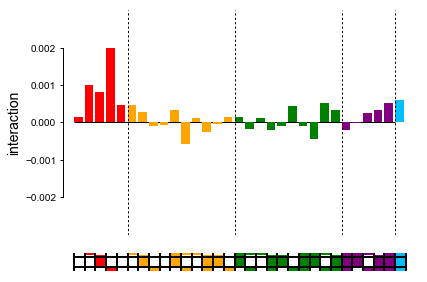

In [163]:
lin = LinearEpistasisModel.from_json("datasets/"+dataset+".json", 
    log_transform=False,
    model_type="global",
)
lin.fit()
lin.plot.epistasis()

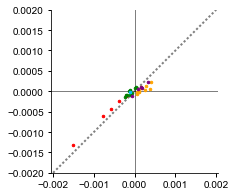

In [137]:
fig, ax = plt.subplots(figsize=(3,3))

orders = range(1, model.length+1)
colors = ("red","orange","green","purple","DeepSkyBlue","yellow","pink")
for o in orders:
    z = linear.epistasis.getorder[o].values
    z2 = lin.epistasis.getorder[o].values
    ax.plot(z2, z, '.', markersize=5, color=colors[o-1])

ax.axis("equal")
ax.axis([-.002, .002, -0.002, 0.002])
#plt.axis("equal")
size = ax.axis()
t = np.linspace(size[0],size[1], 10)
ax.plot(t,t, ":", color="gray", zorder=0)
ax.hlines(0, -1,1, linewidth=.5)
ax.vlines(0, -1,1, linewidth=.5)
fig.savefig("/Users/Zsailer/Dropbox/epistasis-paper/figures/fig-7/"+dataset+".svg", format="svg", bbox_height="tight")